Epoch [500/5000], Loss: 88.8726
Epoch [1000/5000], Loss: 80.5698
Epoch [1500/5000], Loss: 73.9616
Epoch [2000/5000], Loss: 68.1575
Epoch [2500/5000], Loss: 63.0030
Epoch [3000/5000], Loss: 58.3085
Epoch [3500/5000], Loss: 53.9905
Epoch [4000/5000], Loss: 49.9679
Epoch [4500/5000], Loss: 46.2136
Epoch [5000/5000], Loss: 42.7471

Training finished.
Plotting results...


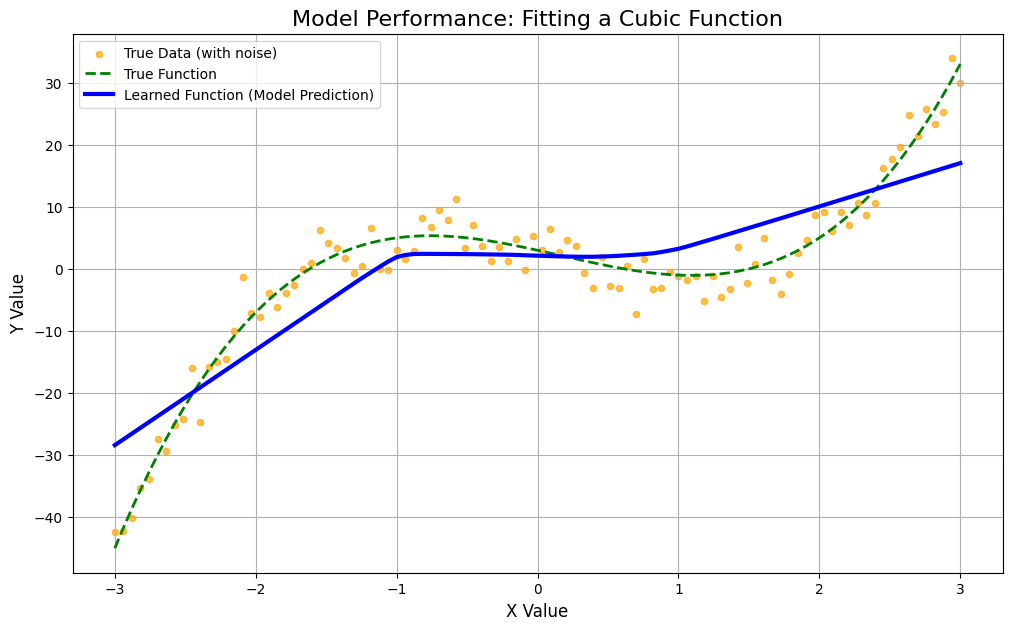

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def true_func(x):
    return 2 * (x**3) - 1 * (x**2) - 5 * x + 3

N_SAMPLES = 100
X = torch.linspace(-3, 3, N_SAMPLES).unsqueeze(1)
y = true_func(X) + torch.randn(N_SAMPLES, 1) * 3

class PolynomialApproximator(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 64)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

model = PolynomialApproximator()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

epochs = 5000
for epoch in range(epochs):
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("\nTraining finished.")
print("Plotting results...")

model.eval()

with torch.no_grad():
    learned_y = model(X)

plt.figure(figsize=(12, 7))
plt.scatter(X.numpy(), y.numpy(), color='orange', label='True Data (with noise)', s=20, alpha=0.7)
plt.plot(X.numpy(), true_func(X).numpy(), 'g--', label='True Function', linewidth=2)
plt.plot(X.numpy(), learned_y.numpy(), color='blue', label='Learned Function (Model Prediction)', linewidth=3)
plt.title('Model Performance: Fitting a Cubic Function', fontsize=16)
plt.xlabel('X Value', fontsize=12)
plt.ylabel('Y Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()